# Midterm Data Analysis
### Jaejun Kim

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data import
train_x = pd.read_csv('MNISTTrainXV2.csv')
train_y = pd.read_csv('MNISTTrainY.csv')
valid_x = pd.read_csv('MNISTValidationX.csv')
valid_y = pd.read_csv('MNISTValidationY.csv')
test_x = pd.read_csv('MNISTTestXRand.csv')
test_y = pd.read_csv('MNISTTestYRand.csv')

In [3]:
# creating a function to plot pixels
def plot_pix(dataframe_x, dataframe_y, i):
    dataframe_x = dataframe_x.to_numpy()
    dataframe_y = dataframe_y.to_numpy()
    pixel_matrix = np.reshape(dataframe_x[i], (12, 12))
    image = plt.imshow(pixel_matrix, cmap='binary')
    plt.title('True Class = {}'.format(dataframe_y[i]))
    return image

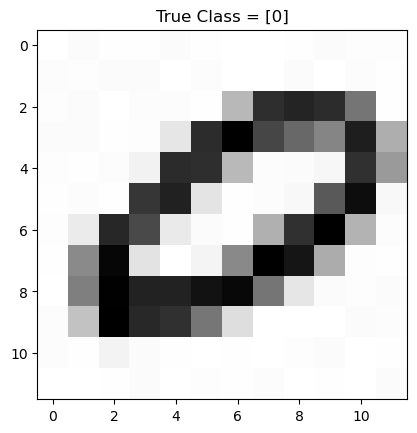

In [4]:
plot_pix(train_x, train_y,144)

## Question 1

In [5]:
import random
random.seed(123)
num = random.sample(range(0, len(train_x)), 9)
print(num)

[1715, 8771, 2856, 13344, 8734, 3529, 1250, 12423, 17570]


In [6]:
# function for plotting pixels for subplots
def plot_mat(dataframe_x, dataframe_y, i, ax):
    dataframe_x = dataframe_x.to_numpy()
    dataframe_y = dataframe_y.to_numpy()
    pixel_matrix = np.reshape(dataframe_x[i], (12, 12))
    image = ax.imshow(pixel_matrix, cmap='binary')
    ax.set_title('True Class = {}'.format(dataframe_y[i]))
    return image

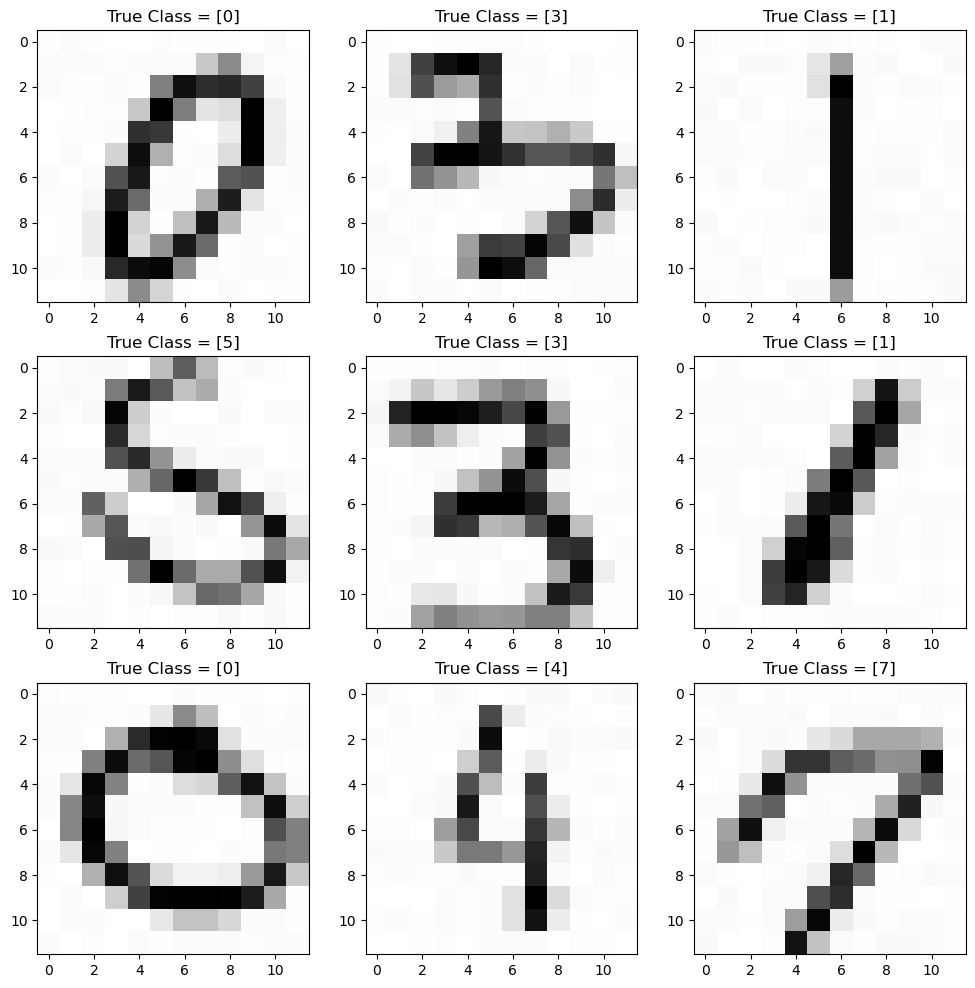

In [7]:
# 9 subplots for random plotting
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axs = axs.flatten()
for i, j in enumerate(num):
    image = plot_mat(train_x, train_y, j, axs[i])
plt.show()

The images match the labels.

## Question 2 - Binary Classification 0 & 1
### Part 1 - Logistic Regression

In [8]:
# creating subsets where labels are 0 or 1
idx = np.where((train_y == 0)|(train_y == 1))[0]
idx
y = train_y.iloc[idx]
X = train_x.iloc[idx]

In [9]:
# fitting the logistic regressoin model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state = 1)
model.fit(X, y.to_numpy().ravel())

LogisticRegression(max_iter=1000, random_state=1)

In [10]:
# cross validation and misclassification using cross validation
from sklearn.model_selection import cross_val_score
log_loss = -cross_val_score(model, X, y.to_numpy().ravel(), cv=5, scoring='neg_log_loss', n_jobs= -1)
misclassification = 1 - cross_val_score(model, X, y.to_numpy().ravel(), cv=5, scoring='accuracy', n_jobs = -1)
log_loss = log_loss.mean()
misclassification = misclassification.mean()
print(f'loss_loss rate: {log_loss}')
print(f'misclassification rate: {misclassification}')

loss_loss rate: 0.0048026153291885155
misclassification rate: 0.001200000000000001


In [11]:
# subset for the validation sets
idx_v = np.where((valid_y == 0)|(valid_y == 1))[0]
idx_v

y_v = valid_y.iloc[idx_v]
X_v = valid_x.iloc[idx_v]
len(y_v)
len(X_v)

3000

In [12]:
# accuracy score
y_pred = model.predict(X_v)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_v, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9983333333333333


In [13]:
#find where y_v and y_pred are not equal and plot them
misclass_idx = np.where(y_pred != y_v.to_numpy().ravel())[0]
misclass_idx

array([1056, 1700, 2058, 2258, 2310])

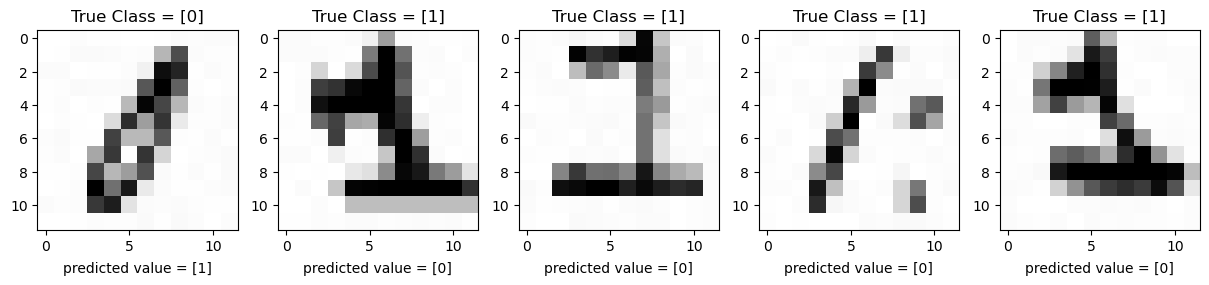

In [14]:
# plotting 5 misclassified images
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (15,15))
axs = axs.flatten()
for i, j in enumerate(misclass_idx):
    plot_mat(X_v, y_v, j, axs[i])
    axs[i].text(1, 14, f'predicted value = [{y_pred[j]}]')
plt.show()

Yes, the misclassifications make sense. The image that is misclassified as 1 has many dark pixels in the middle. These pixels could have affected the model's accuracy. The images that are misclassified as 0 do not have dark pixels in the center. Also unlike shape number 1, the plots are not vertical lines. They are slanted and have an inverted C shape. These could have led to misclassification.

### Part 2 - LASSO

IN THE R FILE

## Question 3

IN THE R FILE

## Question 4 - Binary Classification 4 & 9

In [15]:
# creating a subset where labels are 4 and 9 for the training data
idx_4 = np.where((train_y == 4)|(train_y == 9))[0]
idx_4
X_4 = train_x.iloc[idx_4]
y_4 = train_y.iloc[idx_4]

In [16]:
# creating a subset for the validation data
idx_4_v = np.where((valid_y == 4)|(valid_y == 9))[0]
valid_x_4 = valid_x.iloc[idx_4_v]
valid_y_4 = valid_y.iloc[idx_4_v]

### Part 1 - Logistic Regression

In [17]:
# fitting the logtistic regression models
model_4 = LogisticRegression(max_iter=10000, random_state = 1)
model_4.fit(X_4, y_4.to_numpy().ravel())

LogisticRegression(max_iter=10000, random_state=1)

In [18]:
# cross validation and misclassification using cross validation
log_loss_4 = -cross_val_score(model_4, X_4, y_4.to_numpy().ravel(), cv=5, scoring='neg_log_loss', n_jobs = -1)
misclassification_4 = 1 - cross_val_score(model_4, X_4, y_4.to_numpy().ravel(), cv=5, scoring='accuracy', n_jobs = -1)
log_loss_4 = log_loss_4.mean()
misclassification_4 = misclassification_4.mean()
print(f'log_loss rate: {log_loss_4}')
print(f'misclassification rate: {misclassification_4}')

log_loss rate: 0.15880900331203243
misclassification rate: 0.047800000000000044


In [19]:
# accuracy score
y_pred = model_4.predict(valid_x_4)
accuracy = accuracy_score(valid_y_4, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.965


The misclassification rate for Question 4 was higher than Question 2. The results could have differed because 4s and 9s are harder to distinguish than 0s and 1s. The shapes of 4 and 9 are similar where as the shapes of 0 and 1 are an oval and a vertical line. Also, plots of 0s will tend to have lighter pixels in near the center while plots of 1s will tend to have a darker pixel values near the center.

### Part 2 - 3 Different Algorithms
#### 1. RBF SVM

##### Tuning for the Cost (for loop)

In [20]:
# RBF SVM
# Tuning for the cost parameter
from sklearn.svm import SVC
cost = [0.01, 0.1, 1, 10, 100]
acc = []
for i in cost:
    rbf = SVC(C = i, kernel = 'rbf', probability = True, random_state = 1)
    rbf.fit(X_4, y_4.to_numpy().ravel())
    y_pred = rbf.predict(valid_x_4)
    accuracy = accuracy_score(valid_y_4, y_pred)
    acc.append(accuracy)
max_acc = max(acc)
max_acc_idx = acc.index(max_acc)
opt_cost = cost[max_acc_idx]

print(f'The optimal cost value is {opt_cost}')


The optimal cost value is 100


The model has the highest accuracy score when the C parameter is set to 100.

In [21]:
# The model with the optimal Cost parameter
from sklearn.svm import SVC
rbf_4 = SVC(C = opt_cost, kernel = 'rbf', probability = True, random_state = 1)
rbf_4.fit(X_4, y_4.to_numpy().ravel())

SVC(C=100, probability=True, random_state=1)

In [22]:
# log loss and misclassification using cross validation
# cross validation method dont need valid sets?
from sklearn.metrics import make_scorer, log_loss
ll_score = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
log_loss_rbf = -cross_val_score(rbf_4, X_4, y_4.to_numpy().ravel(), cv=5, scoring=ll_score, n_jobs = -1)
misclass_rbf = 1 - cross_val_score(rbf_4, X_4, y_4.to_numpy().ravel(), cv=5, scoring='accuracy', n_jobs = -1)
print(f'Log loss: {round(np.mean(log_loss_rbf),4)}')
print(f'misclassification rate: {round(np.mean(misclass_rbf),4)}')

Log loss: 0.0474
misclassification rate: 0.0152


#### 2. Random Forest

##### Tuning for max_features (for loop)

In [23]:
# Random forest
# Tuning for the max_features parameter
from sklearn.ensemble import RandomForestClassifier
max_features = [1, 5, 10, 15, 20, 25, 30]
oob = []
for i in max_features:
    rf = RandomForestClassifier(n_estimators = 1000, max_features = i, oob_score=True, random_state = 1, n_jobs = -1)
    rf.fit(X_4, y_4.to_numpy().ravel())
    oob_error = 1 - rf.oob_score_
    oob.append(oob_error)
min_oob = min(oob)
opt_max_feature_idx = oob.index(min_oob)
opt_max_feature = max_features[opt_max_feature_idx]
print(f'The optimal max_feature value is: {opt_max_feature}')

The optimal max_feature value is: 20


In [24]:
# checking the values around the opt_max_feature from the previous chunk
max_features = [16, 17, 18, 19, 20, 21, 22, 23, 24]
oob = []
for i in max_features:
    rf = RandomForestClassifier(n_estimators = 1000, max_features = i, oob_score=True, random_state = 1, n_jobs = -1)
    rf.fit(X_4, y_4.to_numpy().ravel())
    oob_error = 1 - rf.oob_score_
    oob.append(oob_error)
min_oob = min(oob)
opt_max_feature_idx = oob.index(min_oob)
opt_max_feature = max_features[opt_max_feature_idx]
print(f'The optimal max_feature value is: {opt_max_feature}')

The optimal max_feature value is: 17


The out of bag error is the lowest and the accuracy score is the highest when max_features = 17.

In [25]:
# training the model with the optimal max_features parameter
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, max_features = opt_max_feature, oob_score=True, random_state = 1, n_jobs = -1)
rf.fit(X_4, y_4.to_numpy().ravel())

# accuracy score and OOB Error
# log loss and misclassification
y_pred = rf.predict(valid_x_4)
accuracy = accuracy_score(valid_y_4, y_pred)
print('Accuracy:', accuracy)
oob_error = 1 - rf.oob_score_
print('OOB Error:', oob_error)

# log loss and misclassification using cross validation
from sklearn.metrics import make_scorer, log_loss
ll_score_rf = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
log_loss_score_rf = -cross_val_score(rf, X_4, y_4.to_numpy().ravel(), cv = 5, scoring = ll_score_rf, n_jobs = -1)
misclass_rf = 1 - cross_val_score(rf, X_4, y_4.to_numpy().ravel(), cv = 5, scoring = 'accuracy', n_jobs = -1)
print(f'Log loss: {round(np.mean(log_loss_score_rf),4)}')
print(f'misclassification rate: {round(np.mean(misclass_rf),4)}')

Accuracy: 0.982
OOB Error: 0.023399999999999976
Log loss: 0.1364
misclassification rate: 0.0252


#### 3. Gradient Boosted Tree

##### Tuning for depth (for loop)

In [26]:
# GBM
# Tuning for the max_depth parameter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, log_loss
acc = []
for i in range(1,7):
    gbm = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.05, max_depth = i, random_state = 1)
    gbm.fit(X_4, y_4.to_numpy().ravel())
    y_pred = gbm.predict(valid_x_4)
    accuracy = accuracy_score(valid_y_4, y_pred)
    acc.append(accuracy)
max_acc = max(acc)
opt_depth = acc.index(max_acc)+1
print(f'The optimal depth is: {opt_depth}')

KeyboardInterrupt: 

##### Tuning for the number of trees

In [ ]:
# training the model with the optimal max_depth parameter
# tuning for the n_estimators parameter
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators = 1000, n_iter_no_change = 25, learning_rate = 0.05, max_depth = opt_depth, random_state = 1)
gbm.fit(X_4, y_4.to_numpy().ravel())
y_pred = gbm.predict(valid_x_4)

# accuracy score
accuracy = accuracy_score(valid_y_4, y_pred)
print('Accuracy:', accuracy)

# log loss and misclassification rate using cross validation
from sklearn.metrics import make_scorer, log_loss
ll_score_gbm = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
log_loss_score_gbm = -cross_val_score(gbm, X_4, y_4.to_numpy().ravel(), cv = 5, scoring = ll_score_rf, n_jobs = -1)
misclass_gbm = 1 - cross_val_score(gbm, X_4, y_4.to_numpy().ravel(), cv = 5, scoring = 'accuracy', n_jobs = -1)

print(f'Log loss: {round(np.mean(log_loss_score_gbm),4)}')
print(f'misclassification rate: {round(np.mean(misclass_gbm),4)}')

In [ ]:
# table
table_q4 = {'Method':['Logistic Regression', 'RBF SVM', 'Random Forest', 'GBM'],
         'Log Loss':[log_loss_4, round(np.mean(log_loss_rbf),4),round(np.mean(log_loss_score_rf),4), round(np.mean(log_loss_score_gbm),4)],
         'Misclassification Rate':[misclassification_4, round(np.mean(misclass_rbf),4), round(np.mean(misclass_rf),4), round(np.mean(misclass_gbm),4)]}
table_q4 = pd.DataFrame(table_q4)
table_q4

### Part 3

In [ ]:
# generate CSV
# rbf support vector machine
from sklearn.svm import SVC
rbf_4 = SVC(C = 100, kernel = 'rbf', probability = True, random_state = 1)
rbf_4.fit(X_4, y_4.to_numpy().ravel())

image_key = np.array(range(1, len(test_x)+1))
q4_pred = rbf_4.predict(test_x)

q4_df = pd.DataFrame({'Image_Key': image_key, 'Class': q4_pred})

# Export to CSV
#q4_df.to_csv('Q4PredictionsMT2.csv', index = False)

## Question 5 - Anomaly Detection

IN THE R FILE

## Question 6 - 10 Class Classification

### Part 1

#### Multinomial Logistic Regression

In [ ]:
# The amount of time spent to run the code
import time
start = time.time()

# Multinomial logistic regression
mult_log = LogisticRegression(multi_class = 'multinomial', solver = 'saga', max_iter = 10000, n_jobs = -1, random_state = 1)
mult_log.fit(train_x, train_y.to_numpy().ravel())

end = time.time()
elapsed_time_mlr = end - start

print(f'Elapsed time: {elapsed_time_mlr} sec')

In [ ]:
# log loss and misclassification rate using the validation set
from sklearn.metrics import log_loss, accuracy_score

y_pred = mult_log.predict(valid_x)
prob = mult_log.predict_proba(valid_x)

log_loss_reg = log_loss(valid_y, prob)
misclass_reg = 1 - accuracy_score(valid_y, y_pred)

print(f'Log loss: {round(log_loss_reg, 4)}')
print(f'misclassification rate: {round(misclass_reg, 4)}')

#### Random Forest
##### Tuning for max_features

In [ ]:
# Random Forest - multinomial
# Tuning for max_features
from sklearn.ensemble import RandomForestClassifier
max_features = [1, 5, 10, 15, 20, 25, 30]
oob = []
for i in max_features:
    rf_mult = RandomForestClassifier(n_estimators = 1000, max_features = i, oob_score = True, random_state = 1, n_jobs = -1)
    rf_mult.fit(train_x, train_y.to_numpy().ravel())
    oob_error = 1 - rf_mult.oob_score_
    oob.append(oob_error)
min_oob = min(oob)
opt_max_feature_idx = oob.index(min_oob)
opt_max_feature = max_features[opt_max_feature_idx]
print(f'The optimal max_feature value is: {opt_max_feature}')

In [ ]:
# Checking the values around the optimal max_feature value from the previous chunk
max_features = [16, 17, 18, 19, 20, 21, 22, 23, 24]
oob = []
for i in max_features:
    rf_mult = RandomForestClassifier(n_estimators = 1000, max_features = i, oob_score = True, random_state = 1, n_jobs = -1)
    rf_mult.fit(train_x, train_y.to_numpy().ravel())
    oob_error = 1 - rf_mult.oob_score_
    oob.append(oob_error)
min_oob = min(oob)
opt_max_feature_idx = oob.index(min_oob)
opt_max_feature = max_features[opt_max_feature_idx]
print(f'The optimal max_feature value is: {opt_max_feature}')

In [ ]:
# training the optimal model using the optimal max_features parameter
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import cross_val_score
# time
start = time.time()
rf_mult_opt = RandomForestClassifier(n_estimators = 1000, max_features = opt_max_feature, oob_score = True, random_state = 1, n_jobs = -1)
rf_mult_opt.fit(train_x, train_y.to_numpy().ravel())
end = time.time()
elapsed_time_rf = end - start
print(f'Elapsed time: {elapsed_time_rf} sec')

In [ ]:
# oob error, log loss, and misclassification error
oob_error = 1 - rf_mult_opt.oob_score_
print(f'OOB error is {oob_error}')

prob = rf_mult_opt.predict_proba(valid_x)
y_pred = rf_mult_opt.predict(valid_x)

log_loss_mrf = log_loss(valid_y, prob)
misclass_mrf = 1 - accuracy_score(valid_y, y_pred)

print(f'Log loss: {round(log_loss_mrf, 4)}')
print(f'misclassification rate: {round(misclass_mrf, 4)}')

#### Polynomial SVM
##### Tuning for degree and cost

In [ ]:
# polynomial SVM
# tuning for the degree parameter and the cost parameter
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scale = StandardScaler()
train_x_scaled = scale.fit_transform(train_x)
valid_x_scaled = scale.fit_transform(valid_x)
degree = [2, 3, 4]
cost = [0.001, 0.01, 0.1, 1, 10, 100]
max_acc = 0
opt_degree = 0
opt_cost = 0
for i in degree:
    for j in cost:
        svm_poly = SVC(kernel = 'poly', degree = i, C = j, gamma = 'auto', random_state = 1)
        svm_poly.fit(train_x_scaled, train_y.to_numpy().ravel())
        y_pred = svm_poly.predict(valid_x_scaled)
        accuracy = accuracy_score(valid_y, y_pred)
        if accuracy > max_acc:
            max_acc = accuracy
            opt_degree = i
            opt_cost = j
print(f'maximum accuracy is {max_acc}')
print(f'The optimal degree is {opt_degree}')
print(f'The optimal cost is {opt_cost}')

In [ ]:
# training the polynomial SVM with the optimal parameters
#time
start = time.time()
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scale = StandardScaler()
train_x_scaled = scale.fit_transform(train_x)
valid_x_scaled = scale.fit_transform(valid_x)

svm_poly = SVC(kernel = 'poly', degree = opt_degree, C = opt_cost, gamma = 'auto', probability = True, random_state = 1)
svm_poly.fit(train_x_scaled, train_y.to_numpy().ravel())
end = time.time()

elapsed_time_svm = end - start
print(f'Elapsed time: {elapsed_time_svm} sec')


In [ ]:
# log loss and misclassification rate using the validation set
from sklearn.metrics import accuracy_score, log_loss

y_pred = svm_poly.predict(valid_x_scaled)
prob = svm_poly.predict_proba(valid_x_scaled)

log_loss_svm = log_loss(valid_y, prob)
misclass_svm = 1 - accuracy_score(valid_y, y_pred)

print(f'Log loss: {round(log_loss_svm,4)}')
print(f'misclassification: {round(misclass_svm,4)}')

#### Neural Network (Using the sklearn package)

In [ ]:
# Tuning for the number of neurons and hidden layers
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
neuron = [150, 200, 250, 300]
layer = [1, 2, 3]
best_accuracy = 0
best_neuron = 0
best_layer = 0
for i in neuron:
    for j in layer:
        hidden_layer = tuple([i] * j)
        nn = MLPClassifier(hidden_layer_sizes = hidden_layer, max_iter = 1000, random_state = 1)
        nn.fit(train_x, train_y.to_numpy().ravel())
        accuracy = nn.score(valid_x, valid_y)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_neuron = i
            best_layer = j
print(f'The highest accuracy score was {best_accuracy}')
print(f'The optimal number of neuron is {best_neuron}')
print(f'The optimal number of layer is {best_layer}')

In [ ]:
# Training the model with the optimal number of neurons and hidden layers
# Time
start = time.time()
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
hidden_layer = tuple([best_neuron] * best_layer)
nn = MLPClassifier(hidden_layer_sizes = hidden_layer, max_iter = 100, random_state = 1)
nn.fit(train_x, train_y.to_numpy().ravel())
end = time.time()

elapsed_time_nn = end - start
print(f'Elapsed time: {elapsed_time_nn} sec')

In [ ]:
# log loss and misclassification rate using the validation set
from sklearn.metrics import log_loss, accuracy_score

y_pred = nn.predict(valid_x)
prob = nn.predict_proba(valid_x)

log_loss_nn = log_loss(valid_y, prob)
misclass_nn = 1 - accuracy_score(valid_y, y_pred)

print(f'Log loss: {round(log_loss_nn,4)}')
print(f'misclassification: {round(misclass_nn,4)}')

#### Table

In [ ]:
# Method, Tuning Parameters, Log Loss, Misclassification Rate, Time to Compute
table = {'Method':['Logistic Regression', 'Random Forest', 'Polynomial SVM', 'Neural Network'],
         'Tuning Parameters':['Solver', 'max_features', 'dgree, cost', 'number of neurons, hidden layers'],
         'Log Loss':[log_loss_reg, log_loss_mrf,log_loss_svm,log_loss_nn],
         'Misclassification Rate':[misclass_reg, misclass_mrf, misclass_svm, misclass_nn],
         'Time to Compute':[elapsed_time_mlr, elapsed_time_rf, elapsed_time_svm, elapsed_time_nn]}
summary = pd.DataFrame(table)
summary

### Part 2

In [ ]:
# Polynomial SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scale = StandardScaler()
train_x_scaled = scale.fit_transform(train_x)
valid_x_scaled = scale.fit_transform(valid_x)

svm_poly = SVC(kernel = 'poly', degree = 3, C = 10, gamma = 'auto', probability = True, random_state = 1)
svm_poly.fit(train_x_scaled, train_y.to_numpy().ravel())

# Prediction using the validation set
valid_pred = svm_poly.predict(valid_x_scaled)

# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, valid_pred)

print(conf_mat)

Most commonly confused digit pairs are 3 and 9, 3 and 5, and 4 and 9.

In [ ]:
# find where valid_y = 3 and valid_pred = 8
# find where valid_y = 3 and valid_pred = 5
# find where valid_y = 4 and valid_pred =9

# converting valid_y from df to 1D array
valid_y_ = valid_y.to_numpy().ravel()

# misclass_idx_1
misclass_idx_1 = np.where((valid_y_ == 3) & (valid_pred == 8))[0]
print(len(misclass_idx_1))

#misclass_idx_2
misclass_idx_2 = np.where((valid_y_ == 3) & (valid_pred == 5))[0]
print(len(misclass_idx_2))

#misclass_idx_3
misclass_idx_3 = np.where((valid_y_ == 4) & (valid_pred == 9))[0]
print(len(misclass_idx_3))

In [ ]:
# plotting misclassified pairs 3 & 8
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,15))
axs = axs.flatten()

# first pair using the first index
plot_mat(valid_x, valid_y, misclass_idx_1[0], axs[0])
# predicted class
axs[0].text(1, 14, f'predicted value = [{valid_pred[misclass_idx_1[0]]}]')

# second pair using the third index
plot_mat(valid_x, valid_y, misclass_idx_1[2], axs[1])
# predicted class
axs[1].text(1, 14, f'predicted value = [{valid_pred[misclass_idx_1[2]]}]')

In [ ]:
# plotting misclassified pairs 3 & 5
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,15))
axs = axs.flatten()

# first pair using the first index
plot_mat(valid_x, valid_y, misclass_idx_2[0], axs[0])
# predicted class
axs[0].text(1, 14, f'predicted value = [{valid_pred[misclass_idx_2[0]]}]')

# second pair using the third index
plot_mat(valid_x, valid_y, misclass_idx_2[2], axs[1])
# predicted class
axs[1].text(1, 14, f'predicted value = [{valid_pred[misclass_idx_2[2]]}]')

In [ ]:
# plotting misclassified pairs 4 & 9
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,15))
axs = axs.flatten()

# first pair using the first index
plot_mat(valid_x, valid_y, misclass_idx_3[0], axs[0])
# predicted class
axs[0].text(1, 14, f'predicted value = [{valid_pred[misclass_idx_3[0]]}]')

# second pair using the third index
plot_mat(valid_x, valid_y, misclass_idx_3[2], axs[1])
# predicted class
axs[1].text(1, 14, f'predicted value = [{valid_pred[misclass_idx_3[2]]}]')

The shapes of numbers are very similar. Therefore, when the handwritings are not very clear and distinctive, it can be very hard to classify correctly. The first set of plots were plots of 3s that were classified as 8 by the model. While the left side of 3 is open, the left side of 8 is connected. However, the plots show that the curves on the left side are long and appear to be more closing. The second set of plots were plots of 3s that were classified as 5. Both 3 and 5 have the same curves at the bottom. However, the direction of the curves is different on the top. The plots showed that the top curve was not clear enough to distinguish. The last set of plots were plots of 4s that were classified as 9. The shapes of 4 and 9 look very similar and we can distinguish by looking at the upper part of the letter; while 4s have triangular tops, 9s have circular tops. These handwritings were hard to classify even with human eyes. Therefore, the misclassification of the model is reasonable.

### Part 3

In [ ]:
# prediction
test_x_scaled = scale.fit_transform(test_x)
test_pred = svm_poly.predict(test_x_scaled)

# image key
image_key_6 = np.array(range(1, len(test_x)+1))

# merging to a dataframe
pred_df = pd.DataFrame({'Image_Key': image_key_6, 'Class': test_pred})

# csv extraction
#pred_df.to_csv('Q6PredictionsMT2.csv', index = False)